<pre>
RunAll시 결측치가 없는 144개의 독립변수와
binary(0과1)로 구분된 7개의 종속변수가 있는 테이블이 만들어진다.
</pre>

In [1]:
import pandas as pd
import missingno as msno
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

path = './data/'
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.max_columns = 350
pd.options.display.max_rows = 999

In [2]:
sigungu = pd.read_csv(path+'imp_시군구별지역안전지표_2015.csv',encoding='cp949')

In [3]:
sigungu.화재.replace([1,2,3,4,5],[0,0,0,1,1], inplace=True)
sigungu.교통.replace([1,2,3,4,5],[0,0,0,1,1], inplace=True)
sigungu.자연재해.replace([1,2,3,4,5],[0,0,0,1,1], inplace=True)
sigungu.범죄.replace([1,2,3,4,5],[0,0,0,1,1], inplace=True)
sigungu.안전사고.replace([1,2,3,4,5],[0,0,0,1,1], inplace=True)
sigungu.자살.replace([1,2,3,4,5],[0,0,0,1,1], inplace=True)
sigungu.감염병.replace([1,2,3,4,5],[0,0,0,1,1], inplace=True)

In [4]:
sigungu.to_csv(path+'sigungu_imp_10.csv',encoding='cp949',index=False)

In [5]:
sigungu.head()

,년도,시도,시군구,지역,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,화재,교통,자연재해,범죄,안전사고,자살,감염병
0,2015,강원도,강릉시,2015_강원도_강릉시,1161.45445,121.96083,0.04634,0.13901,25.67109,2.03886,1559476.199,37.53354,335.85565,0.02344,0.37070,1668.57424,58.84888,0.00457,77.36,228.30585,392.99003,0.83408,0.04634,0.00641,0.64111,32.34371,44.85489,2.22421,12.51118,0.41704,314.30862,108.15219,36.42143,0.32436,0.02316,2.31551,660.14293,0.13173,13.17299,404.29643,53.98342,22.52012,4.63377,0.50971,1.29746,0.55605,0.50971,0.13901,0.00000,48.65458,68.02374,108.61557,309.39682,19.69352,0.00000,0.00000,0.08170,229.04725,99.99013,0.00176,4.90,-37.53354,23.2,2.25,773.56156,598.26604,406.61332,191.65273,2.0,9931.42020,47.9,27.61727,0.00000,98.65296,89.98781,76.78157,4.7,73.9,59.8,0.00471,0.47098,70.20162,201.29097,489.55780,53.98342,14.78173,458.83590,222.69899,224.83052,6229719.750,0.41704,21.91773,0.09268,209.07,32.2,0.80524,4428.91102,3.66068,0.00231,0.0,0.0,5886.61005,0.00000,0.04634,605.49472,2261.65046,17.39,64.61,2.27055,0.00123,0.12303,53.56638,300.31463,99.4,0.01616,215807.0,1283.55429,2266.60859,5034.96179,1200.47079,0.741,4.0,0.438,0.553,59.98,7.08967,4.68011,522.87461,2564.56000,1371.82761,0.78774,1.52914,0.02068,2.06752,0.02235,0.50971,0.55605,1.62182,0.07086,1040.37773,9.91627,10.79668,0.09268,72985.02829,0.88042,1.57548,0.17458,271425.0696,1,0,1,1,1,1,1
1,2015,강원도,고성군,2015_강원도_고성군,1019.52493,89.86091,0.00000,0.66074,18.50078,1.32148,1845619.941,55.50233,320.12951,0.01056,1.65186,2275.59549,155.93512,0.00032,60.11,173.44478,328.71915,2.31260,0.00000,0.01319,1.31902,71.69051,86.55720,5.94668,14.86670,6.93779,417.91932,173.11441,33.03710,1.65186,0.01407,1.40675,273.77582,0.38895,38.89485,560.63960,52.52899,4.95557,2.64297,0.33037,1.98223,0.33037,0.33037,0.66074,0.00000,23.12597,63.10086,0.00000,203.83891,15.19707,0.00000,0.00000,0.07563,622.08861,37.14953,0.00059,3.44,-2.64297,29.8,0.54,172.12329,1212.79197,639.26790,573.52407,0.6,8314.44712,50.7,28.08154,0.00000,71.36014,94.81648,162.21216,3.9,56.4,64.6,0.00669,0.66858,52.19862,193.92778,395.45409,52.52899,14.53632,1014.23899,187.32036,191.28481,4181780.700,0.00000,28.08154,0.66074,46.31,28.5,0.83098,4079.75156,3.63408,0.00318,0.0,0.0,3766.07221,0.00000,0.00000,764.47851,2672.37107,8.00,55.90,4.95557,0.00141,0.14067,57.81493,313.19171,109.2,0.00447,30269.0,896.95728,2948.56123,4678.71420,885.39430,0.752,2.0,0.746,0.524,71.80,11.89336,1.98223,344.57696,2491.98850,1384.91526,0.66074,0.00000,0.01696,1.69566,0.13449,1.32148,1.32148,4.62519,0.14102,661.09930,29.73339,19.49189,0.00000,129569.85700,0.66074,17.84003,0.14787,0.0000,0,0,0,0,0,0,0
2,2015,강원도,동해시,2015_강원도_동해시,922.56932,116.11430,0.10575,0.10575,27.28369,1.37476,1

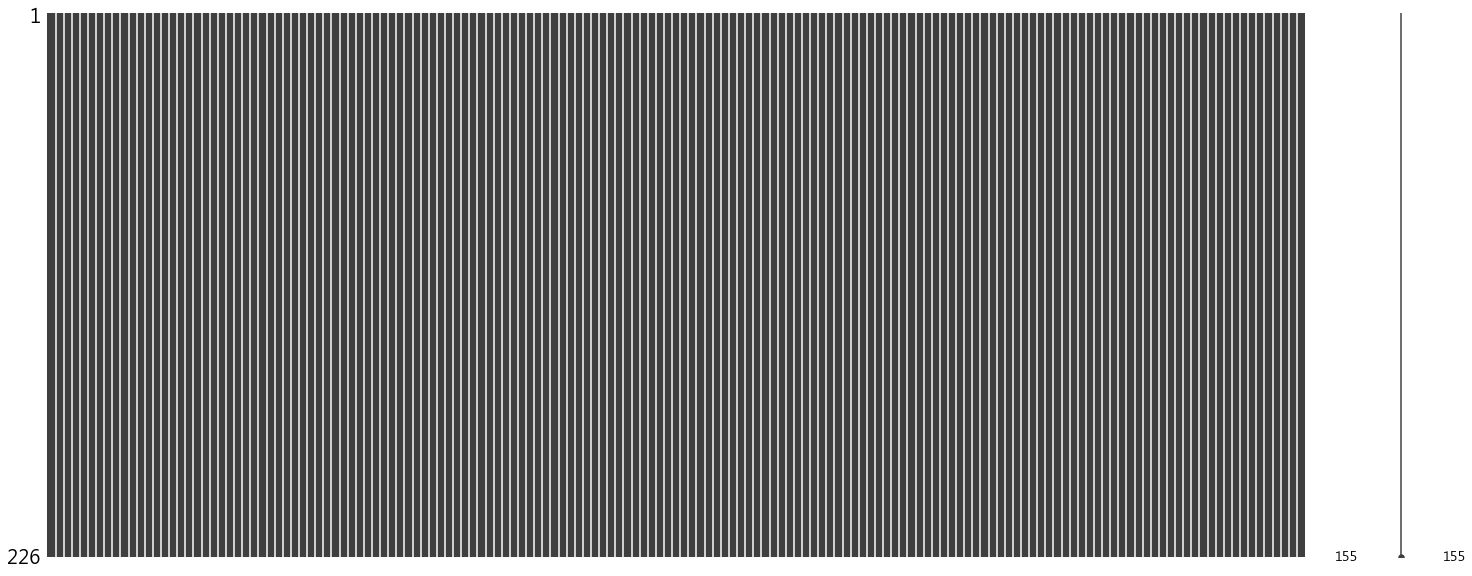

In [6]:
msno.matrix(sigungu)